# Math 542A Homework 7

In [1]:
import math
import numpy as np
import scipy.stats as sp

## Problem 6.5

### a)

We proceed to define a contrast matrix and to compute the test statistic and f value for the given mean vector and covariance matrix.

In [2]:
C = np.matrix([[1,-1,0],[1,0,-1]])

In [3]:
x_bar = np.transpose(np.matrix([46.1,57.3,50.4]))  

In [4]:
S = np.matrix([[101.3,63,71],[63,80.2,55.6],[71,55.6,97.4]])

In [5]:
comp1 = np.transpose(np.matmul(C,x_bar))
comp2 = np.linalg.inv(np.matmul(np.matmul(C,S),np.transpose(C)))
comp3 = np.matmul(C,x_bar)

test_stat = float(40*comp1*comp2*comp3)

In [6]:
f_val = (39*2/38)*sp.f.ppf(.95,2,38)

In [7]:
(test_stat,f_val)

(90.49457756898148, 6.660416635188395)

^ We can clearly reject the null hypothesis since the test statistic greatly exceeds the corresponding f value. Since the test statistic is independent of our choice of C, we conclude that at least two of the three given mean indices differ significantly for all C. 

### b)

We proceed to define a function that will establish simultaneous confidence intervals for this example.

In [8]:
def Single_contrasts_conf_int(i, alpha):
    s = S[i,i]
    coeff = (39*2/38)*sp.f.ppf(1-alpha,2,38)
    
    upper_bound = x_bar[i,0] + math.sqrt(coeff)*math.sqrt(s/40)
    lower_bound = x_bar[i,0] - math.sqrt(coeff)*math.sqrt(s/40)
    
    return(lower_bound,upper_bound)

In [9]:
Single_contrasts_conf_int(0,.05)  #first element of mean vector

(41.99299316671927, 50.20700683328073)

In [10]:
Single_contrasts_conf_int(1,.05)  #second element of mean vector

(53.645668959501236, 60.95433104049876)

In [11]:
Single_contrasts_conf_int(2,.05)  #third element of mean vector

(46.37282797652202, 54.42717202347798)

^ Observe that the 95% confidence intervals between the first and second elements of the mean vector do not overlap. This is consistent with our earlier rejection of the null hypothesis. 

## Problem 6.21

### a)

We will assume that both data groups are multivariate normal and proceed to conduct a hypothesis test on the equality of the covariance matrices. To this end, we will implement Box's Test. 

In [12]:
def Box_test(S_pool,S1,S2,n1,n2,alpha):#for two groups 
    p=len(S_pool)
    g=2
    m1 = n1-1 + n2-1
    m2 = np.log(np.linalg.det(S_pool))
    m3 = (n1-1)*np.log(np.linalg.det(S1))  
    m4 = (n2-1)*np.log(np.linalg.det(S2))
    
    M = m1*m2-(m3+m4)
    
    u1 = (1/(n1-1))+(1/(n2-1))-(1/(n1-1+n2-1))
    u2 = (2*p*p + 3*p -1)/(6*(p+1)*(g-1))
    
    u = u1*u2
    
    C = (1-u)*M
    
    df = 0.5*p*(p+1)*(g-1)
    chi_sq_val = sp.chi2.ppf(1-alpha,df)
    
    return(C,chi_sq_val)

Now we can store the matrices given in the problem into variables.

In [13]:
S1 = np.matrix([[.459,.254,-.026,-.244],
                [.254,27.465,-.589,-.267],
                [-.026,-.589,.03,.102],
                [-.244,-.267,.102,6.854]])
n1 = 20

In [14]:
S2 = np.matrix([[.944,-.089,.002,-.719],
                [-.089,16.432,-.4,19.044],
                [.002,-.4,.024,-.094],
                [-.719,19.044,-.094,61.854]])
n2 = 20

In [15]:
S_pool = ((n1-1)/(n1+n2-2))*S1 + ((n2-1)/(n1+n2-2))*S2
p=4

S_pool was derived using formula (6-21), under the assumption that both groups are multivariate normal and that the respective covariance matrices do not differ significantly. 

In [16]:
Box_test(S_pool,S1,S2,n1,n2,.05)    #(test statistic, chi-square value)

(27.346710146968327, 18.307038053275146)

However, Box's Test (6-52) for the Equality of Covariance Matrices tells us that S1 and S2 do in fact differ significantly at the 95% confidence level. Hence, one might conclude that the pooling is unreasonable.  

### b)

Store the given mean vectors in variables.

In [17]:
x1_bar = np.transpose(np.matrix([2.287,12.6,.347,14.83]))
x2_bar = np.transpose(np.matrix([2.404,7.155,.524,12.84]))

We proceed to test the hypothesis of equality between these two mean vectors. 

In [18]:
T_squared = float(np.matmul(np.matmul(np.transpose(x1_bar-x2_bar),np.linalg.inv(((1/n1)+(1/n2))*S_pool)),(x1_bar-x2_bar)))

In [19]:
c_squared = ((n1+n2-2)*p/(n1+n2-p-1))*sp.f.ppf(.95,p,n1+n2-p-1)

In [20]:
(T_squared,c_squared)

(15.829959574001872, 11.471505951186915)

Hence, we can reject the null hypothesis at the 95% confidence level that the two mean vectors are equal, so that there are significant differences between the financial characteristics of firms with Aa bonds and Baa bonds, respectively. 

### c)

We proceed to derive the simultaneous confidence intervals of the componentwise differences between the two mean vectors. 

In [21]:
def Conf_int(i, alpha):
    s = S_pool[i,i]
    c_squared = ((n1+n2-2)*p/(n1+n2-p-1))*sp.f.ppf(1-alpha,p,n1+n2-p-1)
    
    upper_bound = (x1_bar[i,0]-x2_bar[i,0]) + math.sqrt(c_squared)*math.sqrt(((1/n1)+(1/n2))*s)
    lower_bound = (x1_bar[i,0]-x2_bar[i,0]) - math.sqrt(c_squared)*math.sqrt(((1/n1)+(1/n2))*s)
    
    return(lower_bound,upper_bound)

In [22]:
Conf_int(0,.05)   #CI of difference of first element pair

(-1.0140652944327755, 0.7800652944327754)

In [23]:
Conf_int(1,.05)

(0.42720817122086974, 10.462791828779128)

In [24]:
Conf_int(2,.05)

(-0.35299166476911537, -0.001008335230884727)

In [25]:
Conf_int(3,.05)  #CI of difference of fourth element pair

(-4.28767564825609, 8.267675648256091)

Observe that the 95% confidence intervals of the component-wise differences between the second and third elements of x1_bar and x2_bar, respectively, do not intersect zero, so that the significant difference in the mean vectors can be attributed to these two components. 

### d)

It was demonstrated in part c that the second and third elements differ significantly between the mean vectors. Hence, the long-term interest rate (X2) and the debt-to-equity ratio (X3) are good metrics to discriminate Aa bonds from Baa bonds. 

### e)

We proceed to calculate the T squared test statistic and the corresponding f value in the case of different covariance matrices. 

In [26]:
t1 = np.transpose(x1_bar - x2_bar)
t2 = np.linalg.inv((1/n1)*S1 + (1/n2)*S2)
t3 = x1_bar - x2_bar

T_squared = float(np.matmul(np.matmul(t1,t2),t3))

In [27]:
v1 = p + p*p
v2 = (1/n1)*(np.trace(np.matmul((1/n1)*S1,t2)**2) + np.trace(np.matmul((1/n1)*S1,t2))**2)
v3 = (1/n2)*(np.trace(np.matmul((1/n2)*S2,t2)**2) + np.trace(np.matmul((1/n2)*S2,t2))**2)

v = v1/(v2+v3)

In [28]:
f_val = (v*p/(v-p+1))*sp.f.ppf(.95,p,v-p+1)

In [29]:
(T_squared,f_val)

(15.829959574001862, 11.512592328417268)

We again reject the null hypothesis of equality of the mean vectors, even under the assumption that the covariance matrices differ significantly. Hence, the conclusion here agrees with that of part b. 

## Problem 7.25

### (i)

We'll proceed to load the problem data into variables.

In [30]:
Z = np.matrix([[1,1,7500,220,0,140],
               [1,1,1975,200,0,100],
               [1,0,3600,205,60,111],
               [1,1,675,160,60,120],
               [1,1,750,185,70,83],
               [1,1,2500,180,60,80],
               [1,1,350,154,80,98],
               [1,0,1500,200,70,93],
               [1,1,375,137,60,105],
               [1,1,1050,167,60,74],
               [1,1,3000,180,60,80],
               [1,1,450,160,64,60],
               [1,1,1750,135,90,79],
               [1,0,2000,160,60,80],
               [1,0,4500,180,0,100],
               [1,0,1500,170,90,120],
               [1,1,3000,180,0,129]])

In [31]:
Y = np.matrix([[3389,3149],
               [1101,653],
               [1131,810],
               [596,448],
               [896,844],
               [1767,1450],
               [807,493],
               [1111,941],
               [645,547],
               [628,392],
               [1360,1283], 
               [652,458],
               [860,722],
               [500,384],
               [781,501],
               [1070,405],
               [1754,1520]])

In [32]:
ZZ_inv = np.linalg.inv(np.matmul(np.transpose(Z),Z))
B_hat = np.matmul(np.matmul(ZZ_inv, np.transpose(Z)), Y)

In [33]:
Y_hat = np.matmul(Z,B_hat)

### (ii)

In [34]:
e_hat = Y - Y_hat

In [35]:
np.matmul(np.transpose(e_hat),Y_hat)

matrix([[7.42438715e-07, 5.72297722e-07],
        [5.67990355e-07, 4.37139533e-07]])

^ The floating point error won't quite allow the product of the matrices e_hat and Y_hat to evaluate to zero, but the approximation comes close.

In [36]:
np.matmul(np.transpose(Y),Y)

matrix([[29048664, 24281826],
        [24281826, 20845672]])

In [37]:
np.matmul(np.transpose(Y_hat),Y_hat) + np.matmul(np.transpose(e_hat),e_hat)

matrix([[29048663.99999851, 24281825.99999886],
        [24281825.99999886, 20845671.99999912]])

^ Here we verify the approximate equivalence Y'Y = Y_hat'Y_hat + e_hat'e_hat, which is the sum of squares decomposition.

### (iii)

We'll adapt the code from the DrawConfidenceEclipse function from a previous assignment.

In [38]:
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.patches import Ellipse

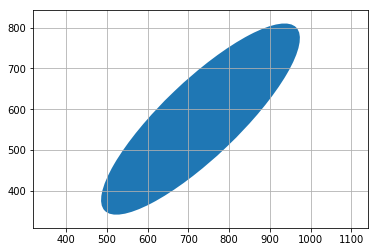

In [39]:
n = len(Z[:,0])
r = Z[0].size-1
m = Y[0].size
    
y1 = np.transpose(np.matrix([Y[i,0] for i in range(n)]))
y2 = np.transpose(np.matrix([Y[i,1] for i in range(n)]))

b1 =  np.transpose(np.matrix([B_hat[i,0] for i in range(r+1)]))
b2 =  np.transpose(np.matrix([B_hat[i,1] for i in range(r+1)]))

sig1 = float(np.matmul(np.transpose(y1-np.matmul(Z,b1)),(y1-np.matmul(Z,b1))))
sig2 = float(np.matmul(np.transpose(y1-np.matmul(Z,b1)),(y2-np.matmul(Z,b2))))
sig3 = float(np.matmul(np.transpose(y2-np.matmul(Z,b2)),(y1-np.matmul(Z,b1))))
sig4 = float(np.matmul(np.transpose(y2-np.matmul(Z,b2)),(y2-np.matmul(Z,b2))))

nSig_hat = np.matrix([[sig1,sig2],[sig3,sig4]])

z0 = np.transpose(np.matrix([1,1,1200,140,70,85]))
    
e_val, e_vec = np.linalg.eig(nSig_hat)

f_val = sp.f.ppf(.95,m,n-r-m)
coeff1 = 1 + float(np.matmul(np.matmul(np.transpose(z0),ZZ_inv),z0))
coeff2 = m/(n-r-m)
    
axis1 = math.sqrt((e_val[0])*coeff1*coeff2*f_val)/2     
axis2 = math.sqrt((e_val[1])*coeff1*coeff2*f_val)/2     
rot = np.arctan(e_vec[0,0]/e_vec[1,0])*180/math.pi  

center = (float(np.matmul(np.transpose(b1),z0)), float(np.matmul(np.transpose(b2),z0)))
    
plt.axes()
ellipse = Ellipse(center, axis1, axis2, rot)
plt.gca().add_patch(ellipse)
plt.axis('scaled')
plt.axis('equal')
plt.grid()
plt.show()

In [40]:
(e_val, e_vec)

(array([ 138866.52458776, 1671850.68527858]),
 matrix([[-0.72322873, -0.69060858],
         [ 0.69060858, -0.72322873]]))

The ellipse seems properly oriented, since the axis with the positive slope is informed by the eigenvector corresponding to the larger eigenvalue.